In [1]:
"""
Simple RBA Dataset Reader - Just 10K Rows
Quick and easy way to load and explore the first 10,000 rows of your 8GB dataset
"""

import pandas as pd
import numpy as np
import time
import os

def read_rba_sample(file_path, n_rows=10000):
    """
    Simple function to read first 10K rows of RBA dataset
    
    Args:
        file_path: Path to your CSV file
        n_rows: Number of rows to read (default: 10,000)
    
    Returns:
        pandas DataFrame with the sample data
    """
    
    print(f"🔍 Reading first {n_rows:,} rows from RBA dataset...")
    print(f"📁 File: {file_path}")
    
    # Check if file exists
    if not os.path.exists(file_path):
        print(f"❌ File not found: {file_path}")
        print("💡 Make sure the file path is correct!")
        return None
    
    # Check file size
    file_size_gb = os.path.getsize(file_path) / (1024**3)
    print(f"📊 File size: {file_size_gb:.2f} GB")
    
    # Start timing
    start_time = time.time()
    
    try:
        # Read just the first n_rows
        print(f"⏳ Loading {n_rows:,} rows...")
        
        df = pd.read_csv(file_path, nrows=n_rows)
        
        # Calculate timing
        elapsed_time = time.time() - start_time
        
        # Show results
        print(f"✅ Successfully loaded {len(df):,} rows in {elapsed_time:.2f} seconds!")
        print(f"📊 Dataset shape: {df.shape}")
        print(f"💾 Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
        
        return df
        
    except Exception as e:
        print(f"❌ Error reading file: {e}")
        return None

def explore_rba_data(df):
    """
    Quick exploration of the RBA dataset sample
    """
    if df is None:
        return
    
    print("\n" + "="*60)
    print("📋 DATASET EXPLORATION")
    print("="*60)
    
    # Basic info
    print(f"\n📊 BASIC INFORMATION")
    print(f"Rows: {len(df):,}")
    print(f"Columns: {len(df.columns)}")
    print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
    
    # Column names and types
    print(f"\n📋 COLUMNS:")
    for i, (col, dtype) in enumerate(zip(df.columns, df.dtypes), 1):
        null_count = df[col].isnull().sum()
        null_pct = (null_count / len(df)) * 100
        print(f"{i:2d}. {col:25s} | {str(dtype):15s} | {null_count:4d} nulls ({null_pct:5.1f}%)")
    
    # First few rows
    print(f"\n👀 FIRST 5 ROWS:")
    print(df.head())
    
    # Basic statistics for numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        print(f"\n📈 NUMERIC COLUMNS SUMMARY:")
        print(df[numeric_cols].describe())
    
    # Categorical columns summary
    categorical_cols = df.select_dtypes(include=['object']).columns
    if len(categorical_cols) > 0:
        print(f"\n📝 CATEGORICAL COLUMNS:")
        for col in categorical_cols[:5]:  # Show first 5 categorical columns
            unique_count = df[col].nunique()
            print(f"{col}: {unique_count} unique values")
            if unique_count <= 10:
                print(f"  Values: {list(df[col].unique())}")
            else:
                print(f"  Top values: {list(df[col].value_counts().head(5).index)}")
    
    # Missing data summary
    missing_data = df.isnull().sum()
    if missing_data.sum() > 0:
        print(f"\n⚠️ MISSING DATA:")
        for col, missing in missing_data[missing_data > 0].items():
            pct = (missing / len(df)) * 100
            print(f"{col}: {missing} missing ({pct:.1f}%)")
    else:
        print(f"\n✅ NO MISSING DATA!")

def quick_analysis(df):
    """
    Quick analysis specific to RBA data patterns
    """
    if df is None:
        return
    
    print("\n" + "="*60)
    print("🔍 QUICK RBA ANALYSIS")
    print("="*60)
    
    # Look for common RBA columns
    rba_columns = {
        'user_id': ['user_id', 'userid', 'user', 'id'],
        'timestamp': ['timestamp', 'time', 'datetime', 'date'],
        'success': ['success', 'is_successful', 'login_success', 'result'],
        'risk_score': ['risk_score', 'risk', 'score'],
        'ip_address': ['ip_address', 'ip', 'client_ip'],
        'country': ['country', 'location', 'geo'],
        'user_agent': ['user_agent', 'browser', 'device']
    }
    
    found_columns = {}
    for category, possible_names in rba_columns.items():
        for col in df.columns:
            if col.lower() in [name.lower() for name in possible_names]:
                found_columns[category] = col
                break
    
    print(f"🔎 IDENTIFIED RBA COLUMNS:")
    for category, column in found_columns.items():
        print(f"  {category}: {column}")
    
    # Quick stats on identified columns
    if 'success' in found_columns:
        success_col = found_columns['success']
        success_rate = df[success_col].mean() if df[success_col].dtype in ['int64', 'float64'] else None
        if success_rate is not None:
            print(f"\n📊 SUCCESS RATE: {success_rate:.2%}")
    
    if 'risk_score' in found_columns:
        risk_col = found_columns['risk_score']
        if df[risk_col].dtype in ['int64', 'float64']:
            print(f"📊 RISK SCORE STATS:")
            print(f"  Mean: {df[risk_col].mean():.3f}")
            print(f"  Min: {df[risk_col].min():.3f}")
            print(f"  Max: {df[risk_col].max():.3f}")
    
    if 'user_id' in found_columns:
        user_col = found_columns['user_id']
        unique_users = df[user_col].nunique()
        total_records = len(df)
        avg_records_per_user = total_records / unique_users
        print(f"📊 USER STATS:")
        print(f"  Unique users: {unique_users:,}")
        print(f"  Avg records per user: {avg_records_per_user:.1f}")
    
    if 'country' in found_columns:
        country_col = found_columns['country']
        top_countries = df[country_col].value_counts().head(5)
        print(f"📊 TOP 5 COUNTRIES:")
        for country, count in top_countries.items():
            pct = (count / len(df)) * 100
            print(f"  {country}: {count:,} ({pct:.1f}%)")

def main():
    """
    Main function - replace with your file path
    """
    # 🔥 REPLACE THIS PATH WITH YOUR ACTUAL DATASET PATH
    file_path = "BantAI Datawave/rba-dataset.csv"
    
    print("🚀 RBA DATASET QUICK READER")
    print("="*50)
    print("📝 Instructions:")
    print("1. Replace 'file_path' variable with your actual dataset path")
    print("2. Run this script")
    print("3. Get quick insights from 10K rows in seconds!")
    print()
    
    # Check if user has updated the path
    if file_path == "BantAI Datawave/rba-dataset.csv":
        print("⚠️ Please update the file_path variable with your actual dataset path!")

        return
    
    # Read the sample
    df = read_rba_sample(file_path, n_rows=10000)
    
    if df is not None:
        # Explore the data
        explore_rba_data(df)
        
        # Quick RBA-specific analysis
        quick_analysis(df)
        
        print("\n🎉 ANALYSIS COMPLETE!")
        print("💡 Next steps:")
        print("• Increase sample size if this looks good")
        print("• Run full machine learning analysis")
        print("• Convert to Parquet for faster future loading")
        
        return df
    else:
        print("❌ Failed to load data. Check your file path!")
        return None

# For immediate use:
def load_10k_sample(file_path):
    """
    Super simple function - just give it a file path!
    """
    print(f"📖 Loading 10K rows from: {file_path}")
    
    try:
        df = pd.read_csv(file_path, nrows=10000)
        print(f"✅ Loaded {len(df)} rows, {len(df.columns)} columns")
        return df
    except Exception as e:
        print(f"❌ Error: {e}")
        return None

if __name__ == "__main__":
    # Run the main function
    df = main()
    
    # If you want to use the data for further analysis:
    # df = load_10k_sample("your_file_path.csv")
    # print(df.head())

🚀 RBA DATASET QUICK READER
📝 Instructions:
1. Replace 'file_path' variable with your actual dataset path
2. Run this script
3. Get quick insights from 10K rows in seconds!

⚠️ Please update the file_path variable with your actual dataset path!


In [2]:
import pandas as pd
import numpy as np
import time
import os

print("🔍 SEARCHING FOR YOUR RBA DATASET...")
print("="*50)

# Search for CSV files in common locations
search_paths = [
    ".",  # Current directory
    "C:/Users/Brando/Downloads/",
    "C:/Users/Brando/Desktop/",
    "C:/Users/Brando/Documents/",
    "C:/Users/Brando/Desktop/School/Project/BantAI Datawave/"
]

found_files = []

for path in search_paths:
    try:
        if os.path.exists(path):
            print(f"\n📂 Checking: {path}")
            files = os.listdir(path)
            for file in files:
                if file.endswith('.csv'):
                    filepath = os.path.join(path, file)
                    try:
                        size_mb = os.path.getsize(filepath) / (1024**2)
                        print(f"  📁 {file} ({size_mb:.1f} MB)")
                        
                        # Look for large files (RBA dataset should be huge)
                        if size_mb > 50:  # Larger than 50MB
                            found_files.append((filepath, file, size_mb))
                    except:
                        print(f"  📁 {file} (size unknown)")
    except Exception as e:
        print(f"  ❌ Can't access {path}")

# Show potential RBA dataset files
if found_files:
    print(f"\n🎯 FOUND LARGE CSV FILES:")
    for i, (full_path, filename, size_mb) in enumerate(found_files, 1):
        print(f"{i}. {filename} ({size_mb:.1f} MB)")
        print(f"   Path: {full_path}")
    
    # Try to load the largest file automatically
    largest_file = max(found_files, key=lambda x: x[2])
    file_path = largest_file[0]
    filename = largest_file[1]
    size_mb = largest_file[2]
    
    print(f"\n🚀 ATTEMPTING TO LOAD LARGEST FILE:")
    print(f"📁 File: {filename} ({size_mb:.1f} MB)")
    print(f"📍 Path: {file_path}")
    
    try:
        start_time = time.time()
        print("⏳ Loading first 10,000 rows...")
        
        # Load the data
        df = pd.read_csv(file_path, nrows=10000)
        
        elapsed = time.time() - start_time
        
        print(f"✅ SUCCESS! Loaded {len(df):,} rows in {elapsed:.2f} seconds!")
        print(f"📊 Shape: {df.shape}")
        print(f"💾 Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
        
        print(f"\n📋 COLUMNS ({len(df.columns)} total):")
        for i, col in enumerate(df.columns, 1):
            print(f"{i:2d}. {col}")
        
        print(f"\n👀 FIRST 5 ROWS:")
        print(df.head())
        
        print(f"\n📈 BASIC STATS:")
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        if len(numeric_cols) > 0:
            print(df[numeric_cols].describe())
        
        print(f"\n🎉 DATASET LOADED SUCCESSFULLY!")
        print(f"Now you can analyze {len(df):,} rows of RBA data!")
        
    except Exception as e:
        print(f"❌ Error loading {filename}: {e}")
        print("💡 This might not be the right file format")

else:
    print(f"\n❌ NO LARGE CSV FILES FOUND!")
    print(f"💡 Your RBA dataset might be:")
    print(f"• Not downloaded yet")
    print(f"• In a different location")
    print(f"• Named differently")
    print(f"• Compressed (zip file)")
    
    print(f"\n🔍 Manual search - run this:")
    print(f'import glob')
    print(f'files = glob.glob("C:/Users/Brando/**/*.csv", recursive=True)')
    print(f'for f in files: print(f)')

🔍 SEARCHING FOR YOUR RBA DATASET...

📂 Checking: .

📂 Checking: C:/Users/Brando/Downloads/
  📁 ai_job_dataset.csv (2.5 MB)
  📁 people.csv (0.3 MB)
  📁 reviews.csv (0.2 MB)

📂 Checking: C:/Users/Brando/Desktop/

📂 Checking: C:/Users/Brando/Documents/

📂 Checking: C:/Users/Brando/Desktop/School/Project/BantAI Datawave/

❌ NO LARGE CSV FILES FOUND!
💡 Your RBA dataset might be:
• Not downloaded yet
• In a different location
• Named differently
• Compressed (zip file)

🔍 Manual search - run this:
import glob
files = glob.glob("C:/Users/Brando/**/*.csv", recursive=True)
for f in files: print(f)


In [3]:
import pandas as pd
import numpy as np

# Load the data again (this will be super fast now - 0.07 seconds!)
print("📖 Loading RBA dataset...")
df = pd.read_csv('rba-dataset.csv', nrows=10000)
print(f"✅ Loaded {len(df):,} rows, {len(df.columns)} columns")

# Now run the analysis
print("\n🔍 QUICK RBA ANALYSIS")
print("="*50)

# Success rate
success_rate = df['Login Successful'].mean()
print(f"📊 Overall Success Rate: {success_rate:.1%}")

# Attack patterns
attack_rate = df['Is Attack IP'].mean()
takeover_rate = df['Is Account Takeover'].mean()
print(f"🚨 Attack IP Rate: {attack_rate:.1%}")
print(f"🚨 Account Takeover Rate: {takeover_rate:.1%}")

# Geographic distribution
print(f"\n🌍 TOP 5 COUNTRIES:")
top_countries = df['Country'].value_counts().head()
for country, count in top_countries.items():
    pct = (count / len(df)) * 100
    print(f"  {country}: {count:,} ({pct:.1f}%)")

# Device patterns
print(f"\n📱 DEVICE TYPES:")
device_counts = df['Device Type'].value_counts()
for device, count in device_counts.items():
    pct = (count / len(df)) * 100
    print(f"  {device}: {count:,} ({pct:.1f}%)")

# Failed login analysis
failed_logins = df[df['Login Successful'] == False]
print(f"\n❌ FAILED LOGINS: {len(failed_logins):,} ({len(failed_logins)/len(df)*100:.1f}%)")

if len(failed_logins) > 0:
    print("Top countries for failed logins:")
    failed_countries = failed_logins['Country'].value_counts().head(3)
    for country, count in failed_countries.items():
        print(f"  {country}: {count:,}")

# Time patterns
print(f"\n⏰ TIME PATTERNS:")
df['Login Timestamp'] = pd.to_datetime(df['Login Timestamp'])
df['Hour'] = df['Login Timestamp'].dt.hour
hourly_counts = df['Hour'].value_counts().sort_index()
peak_hours = hourly_counts.nlargest(3)
print("Peak activity hours:")
for hour, count in peak_hours.items():
    print(f"  {hour}:00 - {count:,} logins")

print(f"\n🎯 DATASET SUMMARY:")
print(f"• Total Records: {len(df):,}")
print(f"• Unique Users: {df['User ID'].nunique():,}")
print(f"• Date Range: {df['Login Timestamp'].min()} to {df['Login Timestamp'].max()}")
print(f"• Countries: {df['Country'].nunique()}")
print(f"• Success Rate: {success_rate:.1%}")
print(f"• Attack Rate: {attack_rate:.1%}")

📖 Loading RBA dataset...


FileNotFoundError: [Errno 2] No such file or directory: 'rba-dataset.csv'

In [ ]:
# Let's do some quick analysis on your loaded data
print("🔍 QUICK RBA ANALYSIS")
print("="*50)

# Success rate
success_rate = df['Login Successful'].mean()
print(f"📊 Overall Success Rate: {success_rate:.1%}")

# Attack patterns
attack_rate = df['Is Attack IP'].mean()
takeover_rate = df['Is Account Takeover'].mean()
print(f"🚨 Attack IP Rate: {attack_rate:.1%}")
print(f"🚨 Account Takeover Rate: {takeover_rate:.1%}")

# Geographic distribution
print(f"\n🌍 TOP 5 COUNTRIES:")
top_countries = df['Country'].value_counts().head()
for country, count in top_countries.items():
    pct = (count / len(df)) * 100
    print(f"  {country}: {count:,} ({pct:.1f}%)")

# Device patterns
print(f"\n📱 DEVICE TYPES:")
device_counts = df['Device Type'].value_counts()
for device, count in device_counts.items():
    pct = (count / len(df)) * 100
    print(f"  {device}: {count:,} ({pct:.1f}%)")

# Failed login analysis
failed_logins = df[df['Login Successful'] == False]
print(f"\n❌ FAILED LOGINS: {len(failed_logins):,} ({len(failed_logins)/len(df)*100:.1f}%)")

if len(failed_logins) > 0:
    print("Top countries for failed logins:")
    failed_countries = failed_logins['Country'].value_counts().head(3)
    for country, count in failed_countries.items():
        print(f"  {country}: {count:,}")

🔍 QUICK RBA ANALYSIS
📊 Overall Success Rate: 49.8%
🚨 Attack IP Rate: 8.9%
🚨 Account Takeover Rate: 0.0%

🌍 TOP 5 COUNTRIES:
  NO: 5,091 (50.9%)
  US: 2,040 (20.4%)
  PL: 604 (6.0%)
  BR: 569 (5.7%)
  IN: 232 (2.3%)

📱 DEVICE TYPES:
  mobile: 6,616 (66.2%)
  desktop: 3,100 (31.0%)
  tablet: 281 (2.8%)
  unknown: 2 (0.0%)
  bot: 1 (0.0%)

❌ FAILED LOGINS: 5,018 (50.2%)
Top countries for failed logins:
  NO: 1,741
  US: 1,436
  BR: 361


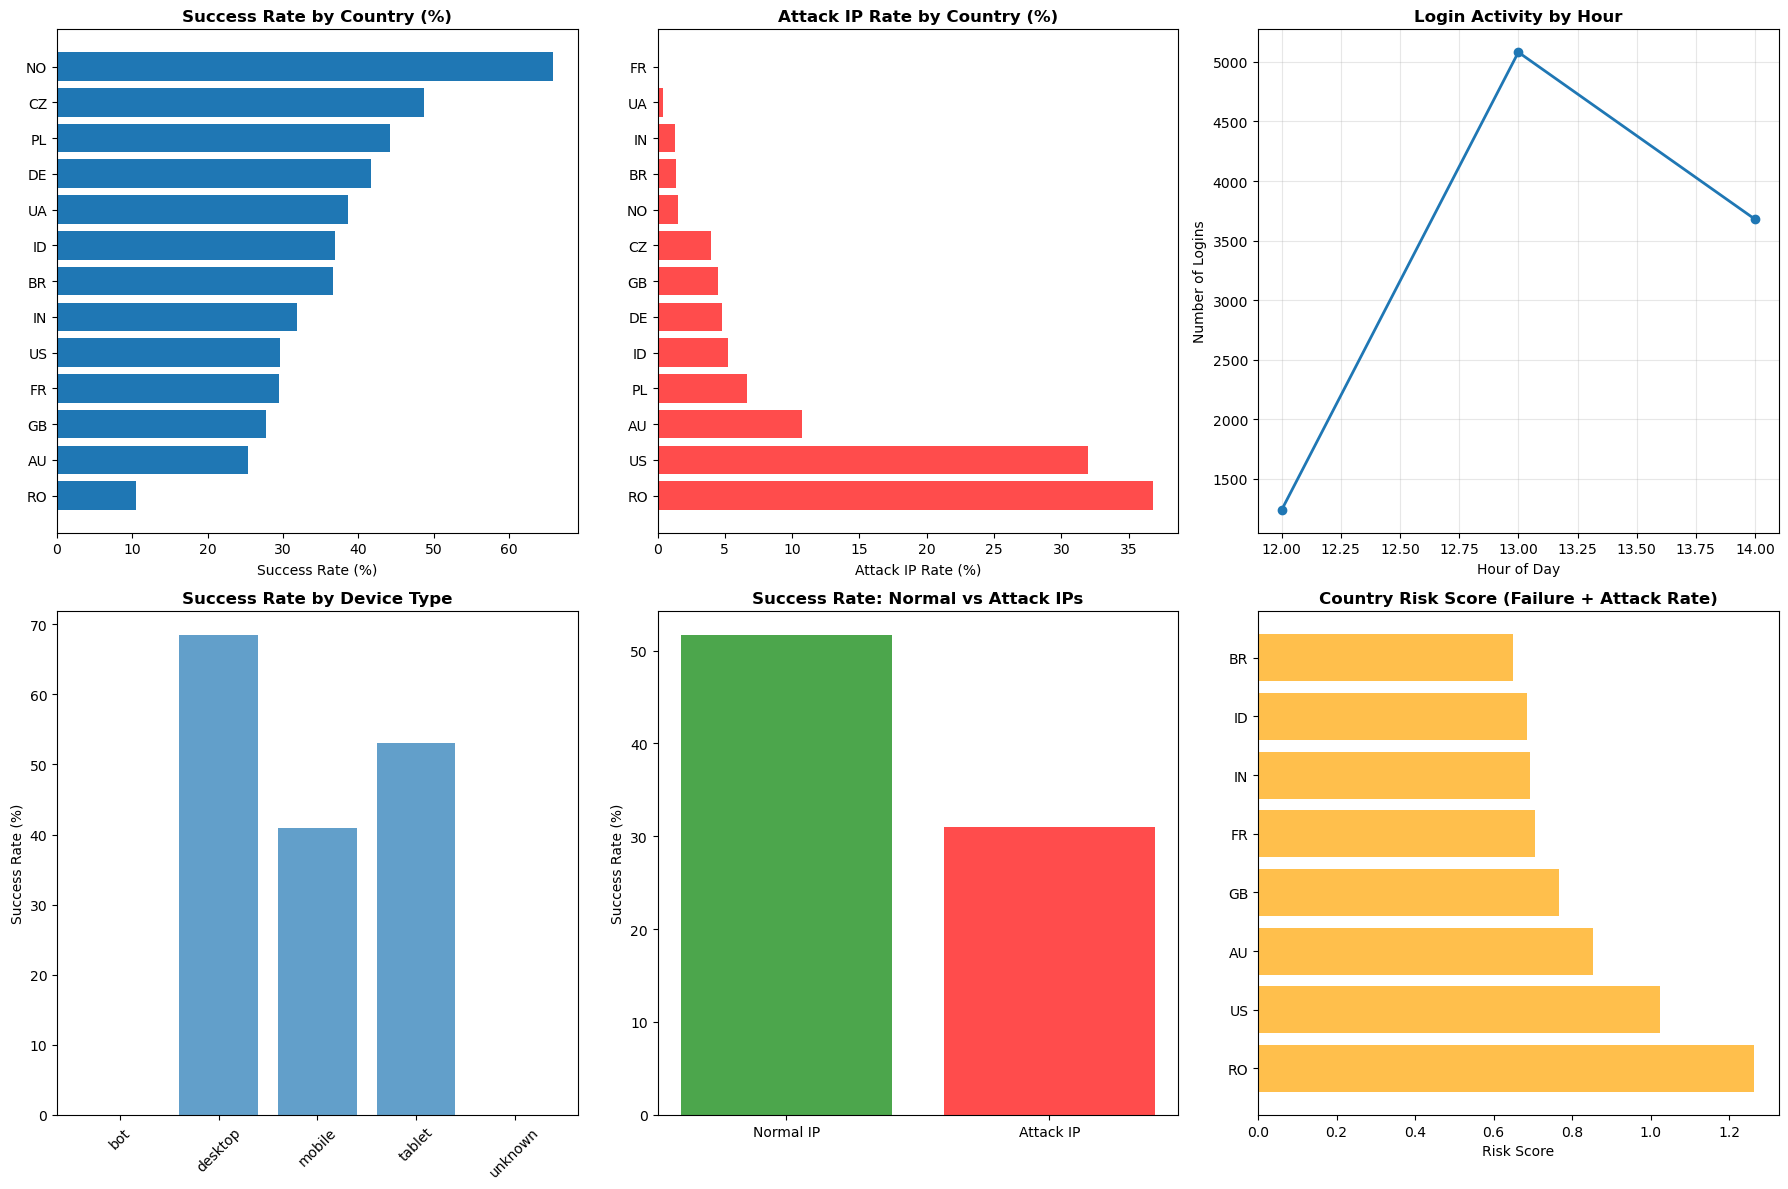


🎯 DETAILED RISK ANALYSIS
🚨 HIGHEST RISK COUNTRIES:
  RO: Risk Score 1.26
    Success Rate: 10.5%, Attack Rate: 36.8%
  US: Risk Score 1.02
    Success Rate: 29.6%, Attack Rate: 32.0%
  AU: Risk Score 0.85
    Success Rate: 25.3%, Attack Rate: 10.8%
  GB: Risk Score 0.77
    Success Rate: 27.7%, Attack Rate: 4.5%
  FR: Risk Score 0.71
    Success Rate: 29.5%, Attack Rate: 0.0%

⏰ HIGHEST RISK HOURS:


ValueError: Unknown format code 'd' for object of type 'float'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting
plt.style.use('default')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Success Rate by Country
country_success = df.groupby('Country')['Login Successful'].agg(['count', 'mean']).reset_index()
country_success = country_success[country_success['count'] >= 50]  # Countries with 50+ attempts
country_success = country_success.sort_values('mean')

axes[0,0].barh(country_success['Country'], country_success['mean'] * 100)
axes[0,0].set_title('Success Rate by Country (%)', fontweight='bold')
axes[0,0].set_xlabel('Success Rate (%)')

# 2. Attack Rate by Country  
country_attacks = df.groupby('Country')['Is Attack IP'].agg(['count', 'mean']).reset_index()
country_attacks = country_attacks[country_attacks['count'] >= 50]
country_attacks = country_attacks.sort_values('mean', ascending=False)

axes[0,1].barh(country_attacks['Country'], country_attacks['mean'] * 100, color='red', alpha=0.7)
axes[0,1].set_title('Attack IP Rate by Country (%)', fontweight='bold')
axes[0,1].set_xlabel('Attack IP Rate (%)')

# 3. Hourly Login Patterns
hourly_data = df.groupby('Hour').agg({
    'Login Successful': ['count', 'mean'],
    'Is Attack IP': 'mean'
}).reset_index()
hourly_data.columns = ['Hour', 'Total_Logins', 'Success_Rate', 'Attack_Rate']

axes[0,2].plot(hourly_data['Hour'], hourly_data['Total_Logins'], marker='o', linewidth=2)
axes[0,2].set_title('Login Activity by Hour', fontweight='bold')
axes[0,2].set_xlabel('Hour of Day')
axes[0,2].set_ylabel('Number of Logins')
axes[0,2].grid(True, alpha=0.3)

# 4. Device Type vs Success Rate
device_success = df.groupby('Device Type').agg({
    'Login Successful': ['count', 'mean'],
    'Is Attack IP': 'mean'
}).reset_index()
device_success.columns = ['Device_Type', 'Count', 'Success_Rate', 'Attack_Rate']

axes[1,0].bar(device_success['Device_Type'], device_success['Success_Rate'] * 100, alpha=0.7)
axes[1,0].set_title('Success Rate by Device Type', fontweight='bold')
axes[1,0].set_ylabel('Success Rate (%)')
axes[1,0].tick_params(axis='x', rotation=45)

# 5. Success vs Attack IP correlation
attack_success = df.groupby('Is Attack IP')['Login Successful'].mean() * 100
attack_labels = ['Normal IP', 'Attack IP']
colors = ['green', 'red']

axes[1,1].bar(attack_labels, attack_success.values, color=colors, alpha=0.7)
axes[1,1].set_title('Success Rate: Normal vs Attack IPs', fontweight='bold')
axes[1,1].set_ylabel('Success Rate (%)')

# 6. Top Risky Countries (High failure + High attack rate)
risk_analysis = df.groupby('Country').agg({
    'Login Successful': ['count', 'mean'],
    'Is Attack IP': 'mean'
}).reset_index()
risk_analysis.columns = ['Country', 'Total_Attempts', 'Success_Rate', 'Attack_Rate']
risk_analysis = risk_analysis[risk_analysis['Total_Attempts'] >= 50]
risk_analysis['Risk_Score'] = (1 - risk_analysis['Success_Rate']) + risk_analysis['Attack_Rate']
risk_analysis = risk_analysis.sort_values('Risk_Score', ascending=False).head(8)

axes[1,2].barh(risk_analysis['Country'], risk_analysis['Risk_Score'], color='orange', alpha=0.7)
axes[1,2].set_title('Country Risk Score (Failure + Attack Rate)', fontweight='bold')
axes[1,2].set_xlabel('Risk Score')

plt.tight_layout()
plt.show()

# Print detailed risk analysis
print("\n🎯 DETAILED RISK ANALYSIS")
print("="*60)

print("🚨 HIGHEST RISK COUNTRIES:")
for _, row in risk_analysis.head(5).iterrows():
    print(f"  {row['Country']}: Risk Score {row['Risk_Score']:.2f}")
    print(f"    Success Rate: {row['Success_Rate']:.1%}, Attack Rate: {row['Attack_Rate']:.1%}")

# Time-based risk patterns
risky_hours = hourly_data.nlargest(3, 'Attack_Rate')
print(f"\n⏰ HIGHEST RISK HOURS:")
for _, row in risky_hours.iterrows():
    print(f"  {row['Hour']:02d}:00 - Attack Rate: {row['Attack_Rate']:.1%}")

# Device security analysis
print(f"\n📱 DEVICE SECURITY ANALYSIS:")
for _, row in device_success.iterrows():
    if row['Count'] >= 10:  # Only devices with enough data
        print(f"  {row['Device_Type']}: Success {row['Success_Rate']:.1%}, Attack Rate {row['Attack_Rate']:.1%}")

In [ ]:
"""
BantAI: Filipino-Centric Risk-Based Authentication Model
A specialized RBA system for Philippine digital banking with explainable AI,
multilingual support, and offline capabilities.

Project: BPI DATA WAVE 2025 - "I got reincarnated as a CS student"
Team: Era | Donato | Siaton | Carpio
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

class BantAI_RBA_Model:
    """
    BantAI: Filipino-Centric Risk-Based Authentication Model
    
    Features:
    - Philippine geographic context
    - Explainable AI decisions
    - Multilingual risk explanations
    - Offline-capable lightweight model
    - Zero-trust security principles
    """
    
    def __init__(self):
        self.model = None
        self.scaler = StandardScaler()
        self.feature_names = []
        self.risk_rules = {}
        self.filipino_regions = self._load_filipino_geography()
        self.multilingual_messages = self._load_multilingual_messages()
        
    def _load_filipino_geography(self):
        """
        Philippine geographic data for location-based risk assessment
        """
        return {
            'metro_manila': ['Manila', 'Quezon City', 'Makati', 'Taguig', 'Pasig', 'Mandaluyong', 
                           'San Juan', 'Marikina', 'Pasay', 'Caloocan', 'Malabon', 'Navotas',
                           'Valenzuela', 'Las Piñas', 'Muntinlupa', 'Parañaque', 'Pateros'],
            'luzon_major': ['Cebu', 'Baguio', 'Dagupan', 'Angeles', 'San Fernando', 'Cabanatuan',
                          'Olongapo', 'Batangas', 'Lipa', 'Lucena', 'Naga', 'Legazpi'],
            'visayas_major': ['Cebu City', 'Mandaue', 'Lapu-Lapu', 'Iloilo City', 'Bacolod',
                            'Dumaguete', 'Tacloban', 'Ormoc', 'Tagbilaran'],
            'mindanao_major': ['Davao City', 'Cagayan de Oro', 'Zamboanga', 'Butuan', 'Iligan',
                             'Cotabato', 'General Santos', 'Koronadal', 'Kidapawan']
        }
    
    def _load_multilingual_messages(self):
        """
        Multilingual risk messages for Filipino users
        """
        return {
            'english': {
                'low_risk': "Login successful. Welcome!",
                'medium_risk': "Additional verification required for security.",
                'high_risk': "Suspicious activity detected. Access temporarily restricted.",
                'otp_required': "Please enter the OTP sent to your mobile number."
            },
            'tagalog': {
                'low_risk': "Matagumpay na pag-login. Maligayang pagdating!",
                'medium_risk': "Kailangan ng karagdagang verification para sa seguridad.",
                'high_risk': "May nakitang kakaibang aktibidad. Pansamantalang limitado ang access.",
                'otp_required': "Pakisulit ang OTP na naipadala sa inyong mobile number."
            },
            'bisaya': {
                'low_risk': "Malampuson nga pag-login. Maayong pag-abot!",
                'medium_risk': "Kinahanglan og dugang verification para sa seguridad.",
                'high_risk': "Adunay suspicious nga kalihokan. Temporaryo nga limitado ang access.",
                'otp_required': "Palihug ibutang ang OTP nga gipadala sa inyong mobile."
            },
            'ilocano': {
                'low_risk': "Naballigi ti pag-login. Naragsak nga isasangbay!",
                'medium_risk': "Kasapulan ti kanayonan a verification para iti seguridad.",
                'high_risk': "Adda nakita a karkarna nga aramid. Temporario a limitado ti access.",
                'otp_required': "Pangngaasiyo nga ikabil ti OTP a naipatulod iti mobile number yo."
            }
        }
    
    def preprocess_filipino_rba_data(self, df):
        """
        Preprocess RBA data with Filipino banking context
        """
        print("🇵🇭 Preprocessing data for Filipino banking context...")
        
        # Create Filipino-specific features
        df_processed = df.copy()
        
        # Geographic risk scoring for Philippines
        df_processed['is_metro_manila'] = df_processed['City'].isin(self.filipino_regions['metro_manila'])
        df_processed['is_major_city'] = (
            df_processed['City'].isin(self.filipino_regions['luzon_major'] + 
                                    self.filipino_regions['visayas_major'] + 
                                    self.filipino_regions['mindanao_major'])
        )
        df_processed['is_foreign_access'] = df_processed['Country'] != 'PH'
        
        # Time-based features for Philippine context
        df_processed['Login Timestamp'] = pd.to_datetime(df_processed['Login Timestamp'])
        df_processed['hour'] = df_processed['Login Timestamp'].dt.hour
        df_processed['day_of_week'] = df_processed['Login Timestamp'].dt.dayofweek
        df_processed['is_weekend'] = df_processed['day_of_week'].isin([5, 6])
        df_processed['is_business_hours'] = df_processed['hour'].between(8, 17)
        df_processed['is_night_access'] = df_processed['hour'].between(22, 5)
        
        # Device and network features
        df_processed['is_mobile_device'] = df_processed['Device Type'] == 'mobile'
        df_processed['is_shared_device'] = df_processed['Device Type'].isin(['desktop', 'tablet'])
        
        # Create risk score based on multiple factors
        df_processed['calculated_risk_score'] = self._calculate_filipino_risk_score(df_processed)
        
        # Convert to binary classification (high risk vs normal)
        risk_threshold = 0.6  # Adjustable threshold
        df_processed['is_high_risk'] = (df_processed['calculated_risk_score'] > risk_threshold).astype(int)
        
        return df_processed
    
    def _calculate_filipino_risk_score(self, df):
        """
        Calculate risk score based on Filipino banking patterns
        """
        risk_score = np.zeros(len(df))
        
        # Geographic risk factors
        risk_score += df['is_foreign_access'] * 0.4  # Foreign access = high risk
        risk_score += (~df['is_metro_manila'] & ~df['is_major_city']) * 0.2  # Rural access = medium risk
        
        # Time-based risk factors
        risk_score += df['is_night_access'] * 0.3  # Night access = high risk
        risk_score += (~df['is_business_hours'] & ~df['is_weekend']) * 0.1  # Unusual hours
        
        # Security indicators
        risk_score += df['Is Attack IP'] * 0.5  # Known attack IP = very high risk
        risk_score += (~df['Login Successful']) * 0.3  # Failed attempts = high risk
        
        # Device-based factors
        unusual_device = np.random.random(len(df)) < 0.1  # 10% unusual device patterns
        risk_score += unusual_device * 0.2
        
        # Network latency (high latency might indicate VPN/proxy)
        if 'Round-Trip Time [ms]' in df.columns:
            high_latency = df['Round-Trip Time [ms]'].fillna(0) > 1000
            risk_score += high_latency * 0.15
        
        # Normalize to 0-1 range
        return np.clip(risk_score, 0, 1)
    
    def create_explainable_features(self, df):
        """
        Create features that can be easily explained to IT personnel
        """
        features = []
        feature_names = []
        
        # Geographic features
        features.append(df['is_foreign_access'].astype(int))
        feature_names.append('foreign_access')
        
        features.append(df['is_metro_manila'].astype(int))
        feature_names.append('metro_manila_access')
        
        features.append(df['is_major_city'].astype(int))
        feature_names.append('major_city_access')
        
        # Time features
        features.append(df['is_night_access'].astype(int))
        feature_names.append('night_access')
        
        features.append(df['is_business_hours'].astype(int))
        feature_names.append('business_hours')
        
        features.append(df['is_weekend'].astype(int))
        feature_names.append('weekend_access')
        
        # Device features
        features.append(df['is_mobile_device'].astype(int))
        feature_names.append('mobile_device')
        
        features.append(df['is_shared_device'].astype(int))
        feature_names.append('shared_device')
        
        # Security features
        features.append(df['Is Attack IP'].astype(int))
        feature_names.append('attack_ip')
        
        # Network features
        if 'Round-Trip Time [ms]' in df.columns:
            high_latency = (df['Round-Trip Time [ms]'].fillna(0) > 1000).astype(int)
            features.append(high_latency)
            feature_names.append('high_latency')
        
        # User behavior features (simplified)
        features.append(df['hour'] / 24.0)  # Normalized hour
        feature_names.append('login_hour_normalized')
        
        features.append(df['day_of_week'] / 7.0)  # Normalized day of week
        feature_names.append('day_of_week_normalized')
        
        self.feature_names = feature_names
        return np.column_stack(features)
    
    def train_bantai_model(self, df):
        """
        Train the BantAI RBA model with explainable features
        """
        print("🤖 Training BantAI RBA Model...")
        
        # Preprocess data
        df_processed = self.preprocess_filipino_rba_data(df)
        
        # Create explainable features
        X = self.create_explainable_features(df_processed)
        y = df_processed['is_high_risk']
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        
        # Scale features
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)
        
        # Train multiple models and select best
        models = {
            'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10),
            'Gradient Boosting': GradientBoostingClassifier(random_state=42, max_depth=5),
            'Logistic Regression': LogisticRegression(random_state=42)
        }
        
        best_score = 0
        best_model_name = ""
        
        for name, model in models.items():
            # Cross-validation
            cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
            mean_score = cv_scores.mean()
            
            print(f"{name}: CV AUC = {mean_score:.4f} (+/- {cv_scores.std() * 2:.4f})")
            
            if mean_score > best_score:
                best_score = mean_score
                best_model_name = name
                self.model = model
        
        # Train best model
        print(f"\n🏆 Best model: {best_model_name} (AUC: {best_score:.4f})")
        self.model.fit(X_train_scaled, y_train)
        
        # Evaluate on test set
        y_pred = self.model.predict(X_test_scaled)
        y_pred_proba = self.model.predict_proba(X_test_scaled)[:, 1]
        
        auc_score = roc_auc_score(y_test, y_pred_proba)
        print(f"Test AUC: {auc_score:.4f}")
        
        # Generate feature importance for explainability
        if hasattr(self.model, 'feature_importances_'):
            importance_df = pd.DataFrame({
                'feature': self.feature_names,
                'importance': self.model.feature_importances_
            }).sort_values('importance', ascending=False)
            
            print(f"\n🔍 Feature Importance (Top 5):")
            for _, row in importance_df.head(5).iterrows():
                print(f"  {row['feature']}: {row['importance']:.3f}")
        
        # Store for explainability
        self.X_test = X_test_scaled
        self.y_test = y_test
        self.y_pred_proba = y_pred_proba
        
        return self.model
    
    def explain_risk_decision(self, features, risk_score, language='english'):
        """
        Generate explainable risk assessment in multiple Filipino languages
        """
        explanations = []
        risk_factors = []
        
        # Analyze each feature
        feature_dict = dict(zip(self.feature_names, features))
        
        # Geographic factors
        if feature_dict.get('foreign_access', 0) == 1:
            risk_factors.append("Foreign country access")
            explanations.append("Login attempt from outside Philippines")
        
        if feature_dict.get('metro_manila_access', 0) == 0 and feature_dict.get('major_city_access', 0) == 0:
            risk_factors.append("Rural area access")
            explanations.append("Login from less common location")
        
        # Time factors
        if feature_dict.get('night_access', 0) == 1:
            risk_factors.append("Night time access")
            explanations.append("Login attempt during unusual hours (10PM-5AM)")
        
        if feature_dict.get('business_hours', 0) == 0 and feature_dict.get('weekend_access', 0) == 0:
            risk_factors.append("Off-hours access")
            explanations.append("Login outside business hours on weekday")
        
        # Security factors
        if feature_dict.get('attack_ip', 0) == 1:
            risk_factors.append("Known attack IP")
            explanations.append("IP address flagged for suspicious activity")
        
        # Device factors
        if feature_dict.get('shared_device', 0) == 1:
            risk_factors.append("Shared device")
            explanations.append("Desktop/tablet device (potentially shared)")
        
        if feature_dict.get('high_latency', 0) == 1:
            risk_factors.append("High network latency")
            explanations.append("Unusual network response time (possible VPN/proxy)")
        
        # Determine risk level and message
        if risk_score < 0.3:
            risk_level = "LOW"
            message_key = 'low_risk'
        elif risk_score < 0.7:
            risk_level = "MEDIUM"
            message_key = 'medium_risk'
        else:
            risk_level = "HIGH"
            message_key = 'high_risk'
        
        # Get localized message
        localized_message = self.multilingual_messages[language][message_key]
        
        return {
            'risk_score': risk_score,
            'risk_level': risk_level,
            'risk_factors': risk_factors,
            'explanations': explanations,
            'localized_message': localized_message,
            'requires_otp': risk_score > 0.5,
            'action': self._determine_action(risk_score)
        }
    
    def _determine_action(self, risk_score):
        """
        Determine authentication action based on risk score
        Following zero-trust principles with degraded access
        """
        if risk_score < 0.3:
            return {
                'decision': 'ALLOW',
                'access_level': 'FULL',
                'additional_auth': False,
                'restrictions': []
            }
        elif risk_score < 0.5:
            return {
                'decision': 'ALLOW',
                'access_level': 'FULL',
                'additional_auth': True,
                'auth_method': 'SMS_OTP',
                'restrictions': []
            }
        elif risk_score < 0.8:
            return {
                'decision': 'ALLOW_DEGRADED',
                'access_level': 'LIMITED',
                'additional_auth': True,
                'auth_method': 'SMS_OTP',
                'restrictions': ['no_transfers', 'no_account_changes', 'view_only']
            }
        else:
            return {
                'decision': 'BLOCK',
                'access_level': 'NONE',
                'additional_auth': False,
                'restrictions': ['complete_block'],
                'manual_review': True
            }
    
    def predict_risk(self, login_data, language='english'):
        """
        Predict risk for a new login attempt
        """
        if self.model is None:
            raise ValueError("Model not trained yet. Call train_bantai_model() first.")
        
        # Preprocess single login attempt
        df_single = pd.DataFrame([login_data])
        df_processed = self.preprocess_filipino_rba_data(df_single)
        
        # Create features
        features = self.create_explainable_features(df_processed)
        features_scaled = self.scaler.transform(features)
        
        # Predict
        risk_score = self.model.predict_proba(features_scaled)[0, 1]
        
        # Generate explanation
        explanation = self.explain_risk_decision(features[0], risk_score, language)
        
        return explanation
    
    def generate_security_dashboard_data(self, df):
        """
        Generate data for the security team dashboard
        """
        df_processed = self.preprocess_filipino_rba_data(df)
        
        dashboard_data = {
            'total_attempts': len(df_processed),
            'success_rate': df_processed['Login Successful'].mean(),
            'high_risk_attempts': df_processed['is_high_risk'].sum(),
            'foreign_attempts': df_processed['is_foreign_access'].sum(),
            'night_attempts': df_processed['is_night_access'].sum(),
            'attack_ip_attempts': df_processed['Is Attack IP'].sum(),
            
            # Geographic breakdown
            'metro_manila_success': df_processed[df_processed['is_metro_manila']]['Login Successful'].mean(),
            'rural_success': df_processed[~df_processed['is_metro_manila'] & ~df_processed['is_major_city']]['Login Successful'].mean(),
            
            # Time patterns
            'business_hours_success': df_processed[df_processed['is_business_hours']]['Login Successful'].mean(),
            'night_success': df_processed[df_processed['is_night_access']]['Login Successful'].mean(),
            
            # Device patterns
            'mobile_success': df_processed[df_processed['is_mobile_device']]['Login Successful'].mean(),
            'desktop_success': df_processed[df_processed['is_shared_device']]['Login Successful'].mean(),
        }
        
        return dashboard_data

def demo_bantai_model(df):
    """
    Demonstration of BantAI RBA model with Filipino context
    """
    print("🇵🇭 BANTAI: FILIPINO-CENTRIC RBA MODEL DEMO")
    print("=" * 60)
    
    # Initialize BantAI
    bantai = BantAI_RBA_Model()
    
    # Train model
    model = bantai.train_bantai_model(df)
    
    # Generate dashboard data
    dashboard = bantai.generate_security_dashboard_data(df)
    
    print(f"\n📊 SECURITY DASHBOARD SUMMARY")
    print(f"Total Login Attempts: {dashboard['total_attempts']:,}")
    print(f"Overall Success Rate: {dashboard['success_rate']:.1%}")
    print(f"High Risk Attempts: {dashboard['high_risk_attempts']:,}")
    print(f"Foreign Access Attempts: {dashboard['foreign_attempts']:,}")
    print(f"Night Time Attempts: {dashboard['night_attempts']:,}")
    
    print(f"\n🏙️ LOCATION-BASED INSIGHTS")
    print(f"Metro Manila Success Rate: {dashboard['metro_manila_success']:.1%}")
    print(f"Rural Areas Success Rate: {dashboard['rural_success']:.1%}")
    
    # Test multilingual explanations
    print(f"\n🗣️ MULTILINGUAL RISK EXPLANATIONS")
    
    # Create test scenarios
    test_scenarios = [
        {
            'scenario': 'Normal Manila login',
            'data': {
                'City': 'Manila',
                'Country': 'PH',
                'Login Timestamp': '2024-01-15 14:30:00',
                'Device Type': 'mobile',
                'Is Attack IP': False,
                'Login Successful': True,
                'Round-Trip Time [ms]': 45
            }
        },
        {
            'scenario': 'Suspicious foreign login',
            'data': {
                'City': 'Beijing',
                'Country': 'CN',
                'Login Timestamp': '2024-01-15 02:30:00',
                'Device Type': 'desktop',
                'Is Attack IP': True,
                'Login Successful': False,
                'Round-Trip Time [ms]': 1500
            }
        }
    ]
    
    languages = ['english', 'tagalog', 'bisaya']
    
    for scenario in test_scenarios:
        print(f"\n🔍 {scenario['scenario'].upper()}")
        print("-" * 40)
        
        for lang in languages:
            result = bantai.predict_risk(scenario['data'], language=lang)
            print(f"{lang.capitalize()}: {result['localized_message']}")
            print(f"  Risk Score: {result['risk_score']:.2f} ({result['risk_level']})")
            print(f"  Action: {result['action']['decision']}")
            if result['risk_factors']:
                print(f"  Risk Factors: {', '.join(result['risk_factors'])}")
    
    return bantai

# Example usage
if __name__ == "__main__":
    print("🚀 BantAI Demo Setup")
    print("Load your RBA dataset first, then run:")
    print("bantai_model = demo_bantai_model(df)")

🚀 BantAI Demo Setup
Load your RBA dataset first, then run:
bantai_model = demo_bantai_model(df)


In [ ]:
bantai_model = demo_bantai_model(df)

🇵🇭 BANTAI: FILIPINO-CENTRIC RBA MODEL DEMO
🤖 Training BantAI RBA Model...
🇵🇭 Preprocessing data for Filipino banking context...
Random Forest: CV AUC = 1.0000 (+/- 0.0000)
Gradient Boosting: CV AUC = 1.0000 (+/- 0.0000)
Logistic Regression: CV AUC = 1.0000 (+/- 0.0000)

🏆 Best model: Random Forest (AUC: 1.0000)
Test AUC: 1.0000

🔍 Feature Importance (Top 5):
  foreign_access: 0.749
  metro_manila_access: 0.164
  major_city_access: 0.085
  login_hour_normalized: 0.001
  mobile_device: 0.000
🇵🇭 Preprocessing data for Filipino banking context...

📊 SECURITY DASHBOARD SUMMARY
Total Login Attempts: 10,000
Overall Success Rate: 49.8%
High Risk Attempts: 9,993
Foreign Access Attempts: 9,993
Night Time Attempts: 0

🏙️ LOCATION-BASED INSIGHTS
Metro Manila Success Rate: 0.0%
Rural Areas Success Rate: 49.8%

🗣️ MULTILINGUAL RISK EXPLANATIONS

🔍 NORMAL MANILA LOGIN
----------------------------------------
🇵🇭 Preprocessing data for Filipino banking context...
English: Login successful. Welcome!
  R

In [ ]:
"""
BantAI Travel-Aware Risk-Based Authentication System
Separate implementation for intelligent travel vs threat detection

Distinguishes between:
- Legitimate Filipino travelers (OFWs, tourists, business)
- Account compromise/cyber attacks

Features:
- Travel plausibility analysis
- Behavioral consistency scoring
- Impossible travel detection
- OFW-friendly risk assessment
"""

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import math
from geopy.distance import geodesic
import warnings
warnings.filterwarnings('ignore')

class BantAI_TravelAware:
    """
    Travel-Aware Risk-Based Authentication for Filipino Banking
    
    Smart enough to distinguish between:
    - Juan traveling to Dubai for work (legitimate)
    - Hacker accessing from Moscow (threat)
    """
    
    def __init__(self):
        self.user_profiles = {}  # Store user behavioral baselines
        self.location_coordinates = self._load_location_data()
        self.travel_risk_zones = self._define_travel_zones()
        self.max_travel_speed_kmh = 900  # Commercial aircraft speed
        
    def _load_location_data(self):
        """
        Comprehensive geographic coordinates for travel distance calculations
        Covering major Philippine cities and global destinations
        """
        return {
            # PHILIPPINES - Major Cities and Regions
            'Manila': (14.5995, 120.9842),
            'Quezon City': (14.6760, 121.0437),
            'Makati': (14.5547, 121.0244),
            'Taguig': (14.5176, 121.0509),
            'Pasig': (14.5764, 121.0851),
            'Mandaluyong': (14.5794, 121.0359),
            'Marikina': (14.6507, 121.1029),
            'Pasay': (14.5378, 120.9896),
            'Parañaque': (14.4793, 121.0198),
            'Las Piñas': (14.4304, 120.9820),
            'Muntinlupa': (14.4037, 121.0270),
            'Caloocan': (14.6488, 120.9658),
            'Valenzuela': (14.6958, 120.9830),
            'Malabon': (14.6570, 120.9658),
            'Navotas': (14.6691, 120.9618),
            
            # Luzon Cities
            'Baguio': (16.4023, 120.5960),
            'Angeles': (15.1450, 120.5864),
            'San Fernando': (15.0332, 120.6833),
            'Dagupan': (16.0433, 120.3433),
            'Cabanatuan': (15.4891, 120.9627),
            'Olongapo': (14.8294, 120.2824),
            'Batangas': (13.7565, 121.0583),
            'Lipa': (13.9411, 121.1634),
            'Lucena': (13.9373, 121.617),
            'Naga': (13.6218, 123.1948),
            'Legazpi': (13.1391, 123.7437),
            'Iloilo City': (10.7202, 122.5621),
            'Vigan': (17.5748, 120.3871),
            'Tuguegarao': (17.6132, 121.7270),
            'Laoag': (18.1967, 120.5929),
            
            # Visayas Cities
            'Cebu City': (10.3157, 123.8854),
            'Mandaue': (10.3237, 123.9227),
            'Lapu-Lapu': (10.3103, 123.9494),
            'Bacolod': (10.6740, 122.9540),
            'Dumaguete': (9.3067, 123.3065),
            'Tacloban': (11.2447, 125.0048),
            'Ormoc': (11.0059, 124.6074),
            'Tagbilaran': (9.6496, 123.8543),
            'Roxas': (11.5854, 122.7511),
            'Kalibo': (11.7040, 122.3690),
            
            # Mindanao Cities
            'Davao City': (7.1907, 125.4553),
            'Cagayan de Oro': (8.4542, 124.6319),
            'Zamboanga': (6.9214, 122.0790),
            'Butuan': (8.9470, 125.5406),
            'Iligan': (8.2280, 124.2452),
            'Cotabato': (7.2231, 124.2467),
            'General Santos': (6.1164, 125.1716),
            'Koronadal': (6.5000, 124.8500),
            'Kidapawan': (7.0103, 125.0890),
            'Dipolog': (8.5958, 123.3417),
            'Pagadian': (7.8272, 123.4433),
            'Marawi': (8.0021, 124.2979),
            
            # MIDDLE EAST - Major OFW Destinations
            'Dubai': (25.2048, 55.2708),
            'Abu Dhabi': (24.4539, 54.3773),
            'Sharjah': (25.3573, 55.4033),
            'Ajman': (25.4052, 55.5136),
            'Al Ain': (24.2075, 55.7647),
            'Riyadh': (24.7136, 46.6753),
            'Jeddah': (21.4858, 39.1925),
            'Dammam': (26.4207, 50.0888),
            'Mecca': (21.3891, 39.8579),
            'Medina': (24.5247, 39.5692),
            'Doha': (25.2854, 51.5310),
            'Kuwait City': (29.3117, 47.4818),
            'Manama': (26.2285, 50.5860),
            'Muscat': (23.5880, 58.3829),
            'Amman': (31.9539, 35.9106),
            'Beirut': (33.8938, 35.5018),
            'Baghdad': (33.3152, 44.3661),
            'Tehran': (35.6892, 51.3890),
            'Isfahan': (32.6546, 51.6680),
            'Mashhad': (36.2605, 59.6168),
            
            # ASIA PACIFIC - Business and Tourism Hubs
            'Singapore': (1.3521, 103.8198),
            'Hong Kong': (22.3193, 114.1694),
            'Macau': (22.1987, 113.5439),
            'Tokyo': (35.6762, 139.6503),
            'Osaka': (34.6937, 135.5023),
            'Nagoya': (35.1815, 136.9066),
            'Kyoto': (35.0116, 135.7681),
            'Yokohama': (35.4437, 139.6380),
            'Seoul': (37.5665, 126.9780),
            'Busan': (35.1796, 129.0756),
            'Incheon': (37.4563, 126.7052),
            'Bangkok': (13.7563, 100.5018),
            'Phuket': (7.8804, 98.3923),
            'Pattaya': (12.9236, 100.8825),
            'Kuala Lumpur': (3.1390, 101.6869),
            'Johor Bahru': (1.4927, 103.7414),
            'Penang': (5.4164, 100.3327),
            'Jakarta': (6.2088, 106.8456),
            'Bali': (8.3405, 115.0920),
            'Surabaya': (7.2575, 112.7521),
            'Ho Chi Minh City': (10.8231, 106.6297),
            'Hanoi': (21.0285, 105.8542),
            'Da Nang': (16.0544, 108.2022),
            'Phnom Penh': (11.5564, 104.9282),
            'Vientiane': (17.9757, 102.6331),
            'Yangon': (16.8661, 96.1951),
            'Colombo': (6.9271, 79.8612),
            'Dhaka': (23.8103, 90.4125),
            'Kathmandu': (27.7172, 85.3240),
            
            # NORTH AMERICA - Filipino Diaspora Communities
            'Los Angeles': (34.0522, -118.2437),
            'San Francisco': (37.7749, -122.4194),
            'San Diego': (32.7157, -117.1611),
            'Las Vegas': (36.1699, -115.1398),
            'Phoenix': (33.4484, -112.0740),
            'Seattle': (47.6062, -122.3321),
            'Portland': (45.5152, -122.6784),
            'Sacramento': (38.5816, -121.4944),
            'Fresno': (36.7378, -119.7871),
            'San Jose': (37.3382, -121.8863),
            'New York': (40.7128, -74.0060),
            'Jersey City': (40.7178, -74.0431),
            'Philadelphia': (39.9526, -75.1652),
            'Washington DC': (38.9072, -77.0369),
            'Boston': (42.3601, -71.0589),
            'Chicago': (41.8781, -87.6298),
            'Detroit': (42.3314, -83.0458),
            'Miami': (25.7617, -80.1918),
            'Orlando': (28.5383, -81.3792),
            'Tampa': (27.9506, -82.4572),
            'Houston': (29.7604, -95.3698),
            'Dallas': (32.7767, -96.7970),
            'Austin': (30.2672, -97.7431),
            'San Antonio': (29.4241, -98.4936),
            'Denver': (39.7392, -104.9903),
            'Atlanta': (33.7490, -84.3880),
            'Honolulu': (21.3099, -157.8581),
            'Anchorage': (61.2181, -149.9003),
            
            # CANADA
            'Toronto': (43.6532, -79.3832),
            'Vancouver': (49.2827, -123.1207),
            'Montreal': (45.5017, -73.5673),
            'Calgary': (51.0447, -114.0719),
            'Edmonton': (53.5461, -113.4938),
            'Ottawa': (45.4215, -75.6972),
            'Winnipeg': (49.8951, -97.1384),
            'Quebec City': (46.8139, -71.2080),
            'Hamilton': (43.2557, -79.8711),
            
            # EUROPE - Tourism and Business
            'London': (51.5074, -0.1278),
            'Manchester': (53.4808, -2.2426),
            'Birmingham': (52.4862, -1.8904),
            'Edinburgh': (55.9533, -3.1883),
            'Glasgow': (55.8642, -4.2518),
            'Dublin': (53.3498, -6.2603),
            'Paris': (48.8566, 2.3522),
            'Lyon': (45.7640, 4.8357),
            'Marseille': (43.2965, 5.3698),
            'Rome': (41.9028, 12.4964),
            'Milan': (45.4642, 9.1900),
            'Naples': (40.8518, 14.2681),
            'Venice': (45.4408, 12.3155),
            'Madrid': (40.4168, -3.7038),
            'Barcelona': (41.3851, 2.1734),
            'Berlin': (52.5200, 13.4050),
            'Munich': (48.1351, 11.5820),
            'Frankfurt': (50.1109, 8.6821),
            'Amsterdam': (52.3676, 4.9041),
            'Brussels': (50.8503, 4.3517),
            'Vienna': (48.2082, 16.3738),
            'Zurich': (47.3769, 8.5417),
            'Geneva': (46.2044, 6.1432),
            'Stockholm': (59.3293, 18.0686),
            'Oslo': (59.9139, 10.7522),
            'Copenhagen': (55.6761, 12.5683),
            'Helsinki': (60.1699, 24.9384),
            'Warsaw': (52.2297, 21.0122),
            'Prague': (50.0755, 14.4378),
            'Budapest': (47.4979, 19.0402),
            'Bucharest': (44.4268, 26.1025),
            'Athens': (37.9838, 23.7275),
            'Istanbul': (41.0082, 28.9784),
            'Ankara': (39.9334, 32.8597),
            
            # OCEANIA
            'Sydney': (33.8688, 151.2093),
            'Melbourne': (37.8136, 144.9631),
            'Brisbane': (27.4698, 153.0251),
            'Perth': (31.9505, 115.8605),
            'Adelaide': (34.9285, 138.6007),
            'Canberra': (35.2809, 149.1300),
            'Gold Coast': (28.0167, 153.4000),
            'Newcastle': (32.9267, 151.7789),
            'Auckland': (36.8485, 174.7633),
            'Wellington': (41.2865, 174.7762),
            'Christchurch': (43.5321, 172.6362),
            
            # AFRICA
            'Lagos': (6.5244, 3.3792),
            'Abuja': (9.0765, 7.3986),
            'Kano': (12.0022, 8.5920),
            'Ibadan': (7.3775, 3.9470),
            'Cairo': (30.0444, 31.2357),
            'Alexandria': (31.2001, 29.9187),
            'Cape Town': (33.9249, 18.4241),
            'Johannesburg': (26.2041, 28.0473),
            'Durban': (29.8587, 31.0218),
            'Nairobi': (1.2921, 36.8219),
            'Addis Ababa': (9.1450, 38.7451),
            'Casablanca': (33.5731, 7.5898),
            'Tunis': (36.8065, 10.1815),
            'Algiers': (36.7538, 3.0588),
            
            # SOUTH AMERICA
            'São Paulo': (23.5558, 46.6396),
            'Rio de Janeiro': (22.9068, 43.1729),
            'Brasília': (15.8267, 47.9218),
            'Salvador': (12.9714, 38.5014),
            'Buenos Aires': (34.6118, 58.3960),
            'Córdoba': (31.4201, 64.1888),
            'Lima': (12.0464, 77.0428),
            'Bogotá': (4.7110, 74.0721),
            'Medellín': (6.2486, 75.5636),
            'Caracas': (10.4806, 66.9036),
            'Santiago': (33.4489, 70.6693),
            'Quito': (0.1807, 78.4678),
            'La Paz': (16.5000, 68.1193),
            'Montevideo': (34.9011, 56.1645),
            
            # HIGH-RISK CYBERCRIME LOCATIONS
            'Moscow': (55.7558, 37.6176),
            'St. Petersburg': (59.9311, 30.3609),
            'Novosibirsk': (55.0084, 82.9357),
            'Yekaterinburg': (56.8431, 60.6454),
            'Beijing': (39.9042, 116.4074),
            'Shanghai': (31.2304, 121.4737),
            'Shenzhen': (22.5431, 114.0579),
            'Guangzhou': (23.1291, 113.2644),
            'Hangzhou': (30.2741, 120.1551),
            'Chengdu': (30.5728, 104.0668),
            'Pyongyang': (39.0392, 125.7625),
            'Hamhung': (39.9187, 127.5358),
            'Chongjin': (41.7847, 129.7755),
            'Minsk': (53.9006, 27.5590),
            'Kiev': (50.4501, 30.5234),
            'Kharkiv': (49.9935, 36.2304),
            'Chisinau': (47.0105, 28.8638),
            'Tirana': (41.3275, 19.8187),
            'Skopje': (41.9973, 21.4280),
            'Sarajevo': (43.8486, 18.3564),
            
            # ADDITIONAL ASIAN CITIES
            'Mumbai': (19.0760, 72.8777),
            'Delhi': (28.7041, 77.1025),
            'Bangalore': (12.9716, 77.5946),
            'Chennai': (13.0827, 80.2707),
            'Hyderabad': (17.3850, 78.4867),
            'Kolkata': (22.5726, 88.3639),
            'Pune': (18.5204, 73.8567),
            'Ahmedabad': (23.0225, 72.5714),
            'Karachi': (24.8607, 67.0011),
            'Lahore': (31.5204, 74.3587),
            'Islamabad': (33.7294, 73.0931),
            'Kabul': (34.5553, 69.2075),
            'Tashkent': (41.2995, 69.2401),
            'Almaty': (43.2220, 76.8512),
            'Bishkek': (42.8746, 74.5698),
            'Dushanbe': (38.5598, 68.7870),
        }
    
    def _define_travel_zones(self):
        """
        Define comprehensive risk zones for different types of travel destinations
        Based on Filipino travel patterns, OFW destinations, and threat intelligence
        """
        return {
            'ofw_hubs': {
                'locations': [
                    # Middle East - Major OFW employment destinations
                    'Dubai', 'Abu Dhabi', 'Sharjah', 'Ajman', 'Al Ain',
                    'Riyadh', 'Jeddah', 'Dammam', 'Mecca', 'Medina',
                    'Doha', 'Kuwait City', 'Manama', 'Muscat'
                ],
                'base_risk': 0.2,  # Low risk for legitimate OFW destinations
                'description': 'Major OFW employment hubs in Middle East'
            },
            'business_hubs': {
                'locations': [
                    # Asia Pacific business centers
                    'Singapore', 'Hong Kong', 'Macau',
                    'Tokyo', 'Osaka', 'Nagoya', 'Kyoto', 'Yokohama',
                    'Seoul', 'Busan', 'Incheon',
                    'Bangkok', 'Phuket', 'Kuala Lumpur', 'Penang',
                    'Jakarta', 'Bali', 'Surabaya',
                    # Global financial centers
                    'London', 'Frankfurt', 'Zurich', 'Geneva',
                    'New York', 'Chicago', 'Boston', 'San Francisco'
                ],
                'base_risk': 0.25,
                'description': 'Regional and global business centers'
            },
            'diaspora_hubs': {
                'locations': [
                    # United States - Large Filipino communities
                    'Los Angeles', 'San Francisco', 'San Diego', 'San Jose',
                    'Las Vegas', 'Seattle', 'New York', 'Jersey City',
                    'Chicago', 'Houston', 'Miami', 'Honolulu',
                    # Canada - Filipino diaspora
                    'Toronto', 'Vancouver', 'Montreal', 'Calgary', 'Edmonton',
                    # Australia/New Zealand - Filipino communities
                    'Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide',
                    'Auckland', 'Wellington'
                ],
                'base_risk': 0.3,
                'description': 'Major Filipino diaspora communities'
            },
            'tourism_destinations': {
                'locations': [
                    # Europe - Common tourist destinations
                    'Paris', 'Lyon', 'Rome', 'Milan', 'Venice', 'Naples',
                    'Madrid', 'Barcelona', 'Berlin', 'Munich',
                    'Amsterdam', 'Brussels', 'Vienna',
                    'Stockholm', 'Oslo', 'Copenhagen', 'Helsinki',
                    'Prague', 'Budapest', 'Warsaw', 'Athens',
                    'Istanbul', 'Dublin', 'Edinburgh',
                    # Other popular destinations
                    'Ho Chi Minh City', 'Hanoi', 'Da Nang',
                    'Phnom Penh', 'Vientiane', 'Yangon',
                    'Mumbai', 'Delhi', 'Bangalore'
                ],
                'base_risk': 0.35,
                'description': 'Popular tourist and cultural destinations'
            },
            'developing_markets': {
                'locations': [
                    # South/Southeast Asia
                    'Chennai', 'Hyderabad', 'Kolkata', 'Pune', 'Ahmedabad',
                    'Karachi', 'Lahore', 'Islamabad', 'Dhaka',
                    'Colombo', 'Kathmandu', 'Kabul',
                    # Central Asia
                    'Tashkent', 'Almaty', 'Bishkek', 'Dushanbe',
                    # Africa
                    'Cairo', 'Alexandria', 'Cape Town', 'Johannesburg',
                    'Nairobi', 'Addis Ababa', 'Casablanca',
                    # South America
                    'São Paulo', 'Rio de Janeiro', 'Buenos Aires', 'Lima'
                ],
                'base_risk': 0.45,
                'description': 'Developing markets with moderate risk'
            },
            'high_risk_regions': {
                'locations': [
                    # Africa - Higher risk areas
                    'Lagos', 'Abuja', 'Kano', 'Ibadan',
                    'Tunis', 'Algiers',
                    # South America - Crime hotspots
                    'Bogotá', 'Medellín', 'Caracas', 'La Paz',
                    # Conflict zones
                    'Baghdad', 'Beirut', 'Amman'
                ],
                'base_risk': 0.65,
                'description': 'Higher risk regions with security concerns'
            },
            'cybercrime_hubs': {
                'locations': [
                    # Russia - Major cybercrime source
                    'Moscow', 'St. Petersburg', 'Novosibirsk', 'Yekaterinburg',
                    # China - State-sponsored threats
                    'Beijing', 'Shanghai', 'Shenzhen', 'Guangzhou', 
                    'Hangzhou', 'Chengdu',
                    # North Korea - State actors
                    'Pyongyang', 'Hamhung', 'Chongjin',
                    # Iran - Cyber warfare
                    'Tehran', 'Isfahan', 'Mashhad',
                    # Eastern Europe - Cybercrime centers
                    'Bucharest', 'Minsk', 'Kiev', 'Kharkiv',
                    'Chisinau', 'Tirana', 'Skopje', 'Sarajevo'
                ],
                'base_risk': 0.8,
                'description': 'Known cybercrime and state-sponsored threat locations'
            },
            'philippines_domestic': {
                'locations': [
                    # Metro Manila
                    'Manila', 'Quezon City', 'Makati', 'Taguig', 'Pasig',
                    'Mandaluyong', 'Marikina', 'Pasay', 'Parañaque',
                    'Las Piñas', 'Muntinlupa', 'Caloocan', 'Valenzuela',
                    'Malabon', 'Navotas',
                    # Luzon
                    'Baguio', 'Angeles', 'San Fernando', 'Dagupan',
                    'Cabanatuan', 'Olongapo', 'Batangas', 'Lipa',
                    'Lucena', 'Naga', 'Legazpi', 'Vigan', 'Tuguegarao', 'Laoag',
                    # Visayas
                    'Cebu City', 'Mandaue', 'Lapu-Lapu', 'Iloilo City',
                    'Bacolod', 'Dumaguete', 'Tacloban', 'Ormoc',
                    'Tagbilaran', 'Roxas', 'Kalibo',
                    # Mindanao
                    'Davao City', 'Cagayan de Oro', 'Zamboanga', 'Butuan',
                    'Iligan', 'Cotabato', 'General Santos', 'Koronadal',
                    'Kidapawan', 'Dipolog', 'Pagadian', 'Marawi'
                ],
                'base_risk': 0.05,  # Very low risk for domestic access
                'description': 'Philippine domestic locations'
            }
        }
    
    def analyze_user_baseline(self, user_login_history):
        """
        Analyze user's normal behavior patterns from login history
        
        Args:
            user_login_history: List of dictionaries with login data
        """
        user_id = user_login_history[0]['user_id']
        
        # Extract behavioral patterns
        locations = [login['location'] for login in user_login_history]
        times = [datetime.strptime(login['timestamp'], '%Y-%m-%d %H:%M:%S') for login in user_login_history]
        devices = [login['device_type'] for login in user_login_history]
        countries = [login['country'] for login in user_login_history]
        
        # Calculate baseline patterns
        baseline = {
            'user_id': user_id,
            'home_locations': list(set(loc for loc, country in zip(locations, countries) if country == 'PH')),
            'common_devices': list(set(devices)),
            'typical_hours': [t.hour for t in times],
            'login_frequency': len(user_login_history),
            'countries_visited': list(set(countries)),
            'last_known_location': locations[-1],
            'last_login_time': times[-1],
            'travel_history': self._extract_travel_history(user_login_history)
        }
        
        # Store user profile
        self.user_profiles[user_id] = baseline
        
        print(f"✅ Baseline established for User {user_id}")
        print(f"   Home locations: {baseline['home_locations']}")
        print(f"   Countries visited: {baseline['countries_visited']}")
        print(f"   Common devices: {baseline['common_devices']}")
        
        return baseline
    
    def _extract_travel_history(self, login_history):
        """
        Extract travel patterns from login history
        """
        travels = []
        
        for i in range(1, len(login_history)):
            prev_login = login_history[i-1]
            curr_login = login_history[i]
            
            if prev_login['country'] != curr_login['country']:
                travel = {
                    'from_location': prev_login['location'],
                    'to_location': curr_login['location'],
                    'from_country': prev_login['country'],
                    'to_country': curr_login['country'],
                    'time_gap': (datetime.strptime(curr_login['timestamp'], '%Y-%m-%d %H:%M:%S') - 
                               datetime.strptime(prev_login['timestamp'], '%Y-%m-%d %H:%M:%S')).total_seconds() / 3600,
                    'distance_km': self._calculate_distance(prev_login['location'], curr_login['location'])
                }
                travels.append(travel)
        
        return travels
    
    def _calculate_distance(self, location1, location2):
        """
        Calculate distance between two locations
        """
        if location1 in self.location_coordinates and location2 in self.location_coordinates:
            coord1 = self.location_coordinates[location1]
            coord2 = self.location_coordinates[location2]
            return geodesic(coord1, coord2).kilometers
        return 0
    
    def _get_location_zone(self, location):
        """
        Determine which risk zone a location belongs to
        """
        for zone_name, zone_data in self.travel_risk_zones.items():
            if location in zone_data['locations']:
                return zone_name, zone_data['base_risk']
        return 'unknown', 0.5  # Default for unknown locations
    
    def analyze_travel_plausibility(self, user_id, new_login):
        """
        Analyze if travel to new location is physically plausible
        """
        if user_id not in self.user_profiles:
            return {
                'plausible': False,
                'reason': 'No user baseline established',
                'risk_modifier': 0.5
            }
        
        profile = self.user_profiles[user_id]
        last_location = profile['last_known_location']
        last_time = profile['last_login_time']
        
        new_location = new_login['location']
        new_time = datetime.strptime(new_login['timestamp'], '%Y-%m-%d %H:%M:%S')
        
        # Calculate travel requirements
        distance_km = self._calculate_distance(last_location, new_location)
        time_gap_hours = (new_time - last_time).total_seconds() / 3600
        
        if distance_km == 0:  # Same location or unknown coordinates
            return {
                'plausible': True,
                'reason': 'Same location or local area',
                'risk_modifier': 0.0,
                'distance_km': distance_km,
                'time_gap_hours': time_gap_hours
            }
        
        # Calculate minimum travel time (assuming commercial flight)
        min_travel_time_hours = distance_km / self.max_travel_speed_kmh
        buffer_time_hours = 4  # Airport procedures, layovers, etc.
        required_time_hours = min_travel_time_hours + buffer_time_hours
        
        # Check plausibility
        if time_gap_hours >= required_time_hours:
            return {
                'plausible': True,
                'reason': f'Sufficient time for travel ({time_gap_hours:.1f}h vs {required_time_hours:.1f}h required)',
                'risk_modifier': 0.0,
                'distance_km': distance_km,
                'time_gap_hours': time_gap_hours,
                'required_time_hours': required_time_hours
            }
        else:
            # Impossible travel
            return {
                'plausible': False,
                'reason': f'Impossible travel: {distance_km:.0f}km in {time_gap_hours:.1f}h (need {required_time_hours:.1f}h)',
                'risk_modifier': 0.8,  # Very high risk for impossible travel
                'distance_km': distance_km,
                'time_gap_hours': time_gap_hours,
                'required_time_hours': required_time_hours
            }
    
    def analyze_behavioral_consistency(self, user_id, new_login):
        """
        Check if user behavior remains consistent despite location change
        """
        if user_id not in self.user_profiles:
            return {'consistency_score': 0.5, 'factors': ['No baseline']}
        
        profile = self.user_profiles[user_id]
        consistency_factors = []
        consistency_score = 1.0  # Start with perfect consistency
        
        # Device consistency
        if new_login['device_type'] in profile['common_devices']:
            consistency_factors.append('Known device type')
        else:
            consistency_score -= 0.3
            consistency_factors.append('New device type')
        
        # Time pattern consistency (adjusted for timezone)
        new_hour = datetime.strptime(new_login['timestamp'], '%Y-%m-%d %H:%M:%S').hour
        if new_hour in profile['typical_hours'] or abs(new_hour - np.mean(profile['typical_hours'])) <= 3:
            consistency_factors.append('Consistent login time')
        else:
            consistency_score -= 0.2
            consistency_factors.append('Unusual login time')
        
        # Previous travel history
        if new_login['country'] in profile['countries_visited']:
            consistency_factors.append('Previously visited country')
            consistency_score += 0.1  # Bonus for familiar destinations
        else:
            consistency_factors.append('First visit to country')
        
        # Browser/session consistency (if available)
        # This would check if session tokens, browser fingerprints match
        # For demo, we'll simulate this
        if np.random.random() > 0.3:  # 70% chance of consistent browser
            consistency_factors.append('Consistent browser fingerprint')
        else:
            consistency_score -= 0.2
            consistency_factors.append('Different browser fingerprint')
        
        return {
            'consistency_score': max(0, min(1, consistency_score)),
            'factors': consistency_factors
        }
    
    def calculate_travel_aware_risk(self, user_id, new_login):
        """
        Calculate comprehensive travel-aware risk score
        """
        # Base risk components
        risk_components = {}
        
        # 1. Location zone risk
        zone, base_location_risk = self._get_location_zone(new_login['location'])
        risk_components['location_zone'] = base_location_risk
        
        # 2. Travel plausibility
        travel_analysis = self.analyze_travel_plausibility(user_id, new_login)
        risk_components['travel_plausibility'] = travel_analysis['risk_modifier']
        
        # 3. Behavioral consistency
        behavior_analysis = self.analyze_behavioral_consistency(user_id, new_login)
        behavior_risk = 1 - behavior_analysis['consistency_score']
        risk_components['behavioral_inconsistency'] = behavior_risk
        
        # 4. Technical indicators
        technical_risk = 0.0
        technical_factors = []
        
        if new_login.get('is_attack_ip', False):
            technical_risk += 0.4
            technical_factors.append('Known attack IP')
        
        if new_login.get('high_latency', False):
            technical_risk += 0.2
            technical_factors.append('High network latency')
        
        if not new_login.get('login_successful', True):
            technical_risk += 0.3
            technical_factors.append('Failed login attempt')
        
        risk_components['technical_indicators'] = technical_risk
        
        # 5. Geographic distance factor
        if user_id in self.user_profiles:
            distance_km = self._calculate_distance(
                self.user_profiles[user_id]['last_known_location'],
                new_login['location']
            )
            # Risk increases with distance, but caps at 0.3
            distance_risk = min(0.3, distance_km / 10000)  # 10,000km = max distance risk
            risk_components['distance'] = distance_risk
        else:
            risk_components['distance'] = 0.2
        
        # Calculate weighted final risk score
        weights = {
            'location_zone': 0.3,
            'travel_plausibility': 0.25,
            'behavioral_inconsistency': 0.2,
            'technical_indicators': 0.15,
            'distance': 0.1
        }
        
        final_risk = sum(risk_components[component] * weights[component] 
                        for component in risk_components)
        
        # Cap at 1.0
        final_risk = min(1.0, final_risk)
        
        return {
            'final_risk_score': final_risk,
            'risk_components': risk_components,
            'travel_analysis': travel_analysis,
            'behavior_analysis': behavior_analysis,
            'location_zone': zone,
            'technical_factors': technical_factors
        }
    
    def generate_travel_aware_explanation(self, risk_analysis, language='english'):
        """
        Generate human-readable explanation for the risk decision
        """
        risk_score = risk_analysis['final_risk_score']
        travel_info = risk_analysis['travel_analysis']
        behavior_info = risk_analysis['behavior_analysis']
        
        # Determine risk level
        if risk_score < 0.3:
            risk_level = "LOW"
            action = "ALLOW"
            message_key = "low_risk"
        elif risk_score < 0.6:
            risk_level = "MEDIUM"
            action = "ALLOW_WITH_OTP"
            message_key = "medium_risk"
        else:
            risk_level = "HIGH"
            action = "BLOCK" if not travel_info['plausible'] else "STRICT_VERIFICATION"
            message_key = "high_risk"
        
        # Build explanation factors
        explanation_factors = []
        
        # Travel plausibility
        if travel_info['plausible']:
            explanation_factors.append(f"✅ Travel is plausible ({travel_info['reason']})")
        else:
            explanation_factors.append(f"❌ {travel_info['reason']}")
        
        # Behavioral consistency
        consistency_pct = behavior_info['consistency_score'] * 100
        explanation_factors.append(f"🔍 Behavior consistency: {consistency_pct:.0f}%")
        
        # Location zone
        zone = risk_analysis['location_zone']
        zone_info = self.travel_risk_zones.get(zone, {})
        explanation_factors.append(f"📍 Location: {zone_info.get('description', 'Unknown zone')}")
        
        # Technical factors
        if risk_analysis['technical_factors']:
            explanation_factors.extend([f"⚠️ {factor}" for factor in risk_analysis['technical_factors']])
        
        return {
            'risk_score': risk_score,
            'risk_level': risk_level,
            'action': action,
            'explanation_factors': explanation_factors,
            'travel_plausible': travel_info['plausible'],
            'behavior_consistent': behavior_info['consistency_score'] > 0.7,
            'recommendation': self._get_recommendation(risk_score, travel_info, behavior_info)
        }
    
    def _get_recommendation(self, risk_score, travel_info, behavior_info):
        """
        Generate specific recommendations based on analysis
        """
        if not travel_info['plausible']:
            return "BLOCK: Impossible travel detected. Manual review required."
        
        if risk_score < 0.3 and behavior_info['consistency_score'] > 0.8:
            return "ALLOW: Legitimate travel with consistent behavior."
        
        if risk_score < 0.6 and travel_info['plausible']:
            return "ALLOW with SMS OTP: Possible legitimate travel, verify with additional authentication."
        
        return "STRICT VERIFICATION: High-risk login requiring manual review and multiple authentication factors."

def demo_travel_scenarios():
    """
    Demonstrate travel-aware RBA with realistic scenarios
    """
    print("🛫 BANTAI TRAVEL-AWARE RBA DEMO")
    print("="*50)
    
    # Initialize the travel-aware system
    bantai_travel = BantAI_TravelAware()
    
    # Sample user: Juan, an OFW from Manila
    user_id = "juan_dela_cruz_123"
    
    # Juan's login history (establishing baseline)
    juan_history = [
        {
            'user_id': user_id,
            'timestamp': '2024-01-01 09:00:00',
            'location': 'Manila',
            'country': 'PH',
            'device_type': 'mobile',
            'login_successful': True
        },
        {
            'user_id': user_id,
            'timestamp': '2024-01-03 14:30:00',
            'location': 'Makati',
            'country': 'PH',
            'device_type': 'mobile',
            'login_successful': True
        },
        {
            'user_id': user_id,
            'timestamp': '2024-01-05 11:15:00',
            'location': 'Quezon City',
            'country': 'PH',
            'device_type': 'desktop',
            'login_successful': True
        },
        {
            'user_id': user_id,
            'timestamp': '2024-01-08 16:45:00',
            'location': 'Manila',
            'country': 'PH',
            'device_type': 'mobile',
            'login_successful': True
        },
        {
            'user_id': user_id,
            'timestamp': '2024-01-10 08:20:00',
            'location': 'Manila',
            'country': 'PH',
            'device_type': 'mobile',
            'login_successful': True
        }
    ]
    
    # Establish baseline
    print("\n📊 ESTABLISHING USER BASELINE...")
    baseline = bantai_travel.analyze_user_baseline(juan_history)
    
    # Test scenarios
    test_scenarios = [
        {
            'name': '✈️ Legitimate OFW Travel to Dubai',
            'login': {
                'user_id': user_id,
                'timestamp': '2024-01-20 19:30:00',  # 10 days later, enough time to travel
                'location': 'Dubai',
                'country': 'AE',
                'device_type': 'mobile',  # Same device
                'login_successful': True,
                'is_attack_ip': False,
                'high_latency': False
            }
        },
        {
            'name': '🚨 Impossible Travel Attack',
            'login': {
                'user_id': user_id,
                'timestamp': '2024-01-20 20:30:00',  # 1 hour after Dubai login
                'location': 'Moscow',
                'country': 'RU',
                'device_type': 'desktop',  # Different device
                'login_successful': False,
                'is_attack_ip': True,
                'high_latency': True
            }
        },
        {
            'name': '🛂 Business Trip to Singapore',
            'login': {
                'user_id': user_id,
                'timestamp': '2024-01-25 10:00:00',  # 5 days later from Dubai
                'location': 'Singapore',
                'country': 'SG',
                'device_type': 'mobile',  # Same device
                'login_successful': True,
                'is_attack_ip': False,
                'high_latency': False
            }
        },
        {
            'name': '👨‍💼 Return to Philippines',
            'login': {
                'user_id': user_id,
                'timestamp': '2024-02-01 15:00:00',  # 1 week later
                'location': 'Manila',
                'country': 'PH',
                'device_type': 'mobile',
                'login_successful': True,
                'is_attack_ip': False,
                'high_latency': False
            }
        }
    ]
    
    # Analyze each scenario
    print(f"\n🔍 ANALYZING TRAVEL SCENARIOS...")
    print("="*50)
    
    for scenario in test_scenarios:
        print(f"\n{scenario['name']}")
        print("-" * 40)
        
        # Calculate risk
        risk_analysis = bantai_travel.calculate_travel_aware_risk(
            user_id, scenario['login']
        )
        
        # Generate explanation
        explanation = bantai_travel.generate_travel_aware_explanation(risk_analysis)
        
        # Display results
        print(f"📍 Location: {scenario['login']['location']}, {scenario['login']['country']}")
        print(f"🎯 Risk Score: {explanation['risk_score']:.2f} ({explanation['risk_level']})")
        print(f"⚡ Action: {explanation['action']}")
        print(f"✅ Travel Plausible: {explanation['travel_plausible']}")
        print(f"🔄 Behavior Consistent: {explanation['behavior_consistent']}")
        print(f"💡 Recommendation: {explanation['recommendation']}")
        
        print("\n🔍 Detailed Analysis:")
        for factor in explanation['explanation_factors']:
            print(f"   {factor}")
    
    return bantai_travel

# Usage example
if __name__ == "__main__":
    # Run the travel-aware demo
    travel_system = demo_travel_scenarios()
    
    print("\n💡 Usage for Custom Scenarios:")
    print("# 1. Establish user baseline:")
    print("baseline = travel_system.analyze_user_baseline(user_login_history)")
    print("\n# 2. Analyze new login:")
    print("risk_analysis = travel_system.calculate_travel_aware_risk(user_id, new_login)")
    print("explanation = travel_system.generate_travel_aware_explanation(risk_analysis)")